# Аналитика с июля по август 2024 года и reach rate

__Загружаем библиотеки и добавлеям данные о динамике подписчиков.__

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [53]:
topics = pd.read_parquet('topics.parquet')
subs = pd.read_excel('подписчики.xlsx')
df = pd.read_excel("all_data_cleaned.xlsx")
df['month'] = df['date'].dt.month
df['join'] = df['formatted_date'].astype(str) + '-' + df['bank'].astype(str)
df = df.merge(topics, how = 'left', on  ='id') 
days_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

# Convert the 'day_of_week_russian' column to a categorical type with the specified order
df['day_of_week_russian'] = pd.Categorical(df['day_of_week_russian'], categories=days_order, ordered=True)


In [55]:
reach_rate = subs.merge(df[[ 'day_of_week', 'day_of_week_russian', 'hour', 'text_post', 'gpt_cluster', 'kmeans_cluster',
       'accumulative_reaction', 'views', 'forwards', 'reaction_dict', 'media_type', 
       'video.duration',  'video_note.duration', 'month', 'id',
       'animation.duration', 'join'
                            
                           ]], on ='join', how = 'left' )
reach_rate['reach_rate'] = reach_rate['views'] / reach_rate['amount'] * 100
reach_rate.drop_duplicates(subset=['id'],inplace=True)

In [56]:
reach_rate[['reach_rate', 'growth', 'forwards', 'accumulative_reaction']]\
.corr().sort_values('reach_rate', ascending = False)

,reach_rate,growth,forwards,accumulative_reaction
reach_rate,1.000000,-0.017275,0.210067,0.050392
forwards,0.210067,0.018194,1.000000,0.441505
accumulative_reaction,0.050392,0.053733,0.441505,1.000000
growth,-0.017275,1.000000,0.018194,0.053733


In [57]:
reach_rate.sort_values('reach_rate', ascending = False)

,date,amount,growth,bank,join,day_of_week,day_of_week_russian,hour,text_post,gpt_cluster,...,views,forwards,reaction_dict,media_type,video.duration,video_note.duration,month,id,animation.duration,reach_rate
3979,08.07.2024,93018,16,Газпромбанк,08.07.2024-Газпромбанк,1.0,Понедельник,12.0,Ищете интересную и перспективную работу?\n\nГ...,Имиджевая статистика по клиентам,...,2370557.0,1665.0,"{'👍': 74, '❤': 22, '🔥': 8, '😁': 8, '👌': 4, '🎉'...",photo,NaN,NaN,7.0,1683.0,NaN,2548.492765
1767,09.09.2024,96904,247,Газпромбанк,09.09.2024-Газпромбанк,1.0,Понедельник,16.0,🪙Один вклад — двойная выгода!\n \nГазпромбанк...,HR бренд,...,478176.0,139.0,"{'👍': 54, '😁': 31, '😱': 15, '❤': 12, '🔥': 9, '...",photo,NaN,NaN,9.0,1888.0,NaN,493.453315
1726,10.09.2024,97186,282,Газпромбанк,10.09.2024-Газпромбанк,2.0,Вторник,13.0,😃Реальная выгода от 500 000 рублей в год\n\nГ...,PR-повестка,...,442475.0,566.0,"{'👍': 86, '😱': 23, '❤': 22, '😁': 13, '🔥': 7, '...",photo,NaN,NaN,9.0,1890.0,NaN,455.286770
1095,19.09.2024,97806,458,Газпромбанк,19.09.2024-Газпромбанк,4.0,Четверг,18.0,💼Ищете интересную и перспективную работу?\n\n...,Имиджевая статистика по клиентам,...,394712.0,236.0,"{'👍': 240, '❤': 76, '🔥': 62, '👏': 37, '🥰': 26,...",photo,NaN,NaN,9.0,1934.0,NaN,403.566243
6406,25.07.2024,835248,1879,Альфа Банк,25.07.2024-Альфа Банк,4.0,Четверг,16.0,Зажгли красное солнце. Под его лучами — Альфа...,Аналитика,...,3107935.0,819.0,"{'❤': 1599, '🔥': 634, '👍': 481, '👎': 250, '🤯':...",video,50.0,NaN,7.0,2205.0,NaN,372.097269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,30.09.2024,300430,-128,Тинькофф Банк,30.09.2024-Тинькофф Банк,1.0,Понедельник,16.0,,NaN,...,43707.0,129.0,{},photo,NaN,NaN,9.0,8199.0,NaN,14.548148
6,30.09.2024,300430,-128,Тинькофф Банк,30.09.2024-Тинькофф Банк,1.0,Понедельник,15.0,У предпринимателей есть много способов увелич...,Новости,...,43138.0,12.0,"{'👍': 105, '👎': 23, '❤': 8, '👏': 3, '😢': 2, '😍...",photo,NaN,NaN,9.0,8194.0,NaN,14.358752
7,29.09.2024,300558,-20,Тинькофф Банк,29.09.2024-Тинькофф Банк,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4403,18.09.2024,288979,8594,ВТБ Банк,18.09.2024-ВТБ Банк,3.0,Среда,18.0,,NaN,...,NaN,NaN,{},NaN,NaN,NaN,9.0,2426.0,NaN,NaN


*```Reach_rate```* наиболее скоррелирован с числом репостов, однако корреляция совсем слабая (просмотры и число подписчиков не учтены т к они фактически формируют reach_rate). То есть чем больше охват, тем больше пересылок.

Интересно, что увеличения охвата (reach_rate) отрицательно скоррелирона с приростом числа подписчиков, но корреляция очень слабая.

Далее рассмотрим подробнее динамику роста подписчиков и reach_rate в зависимости от дня недели и часа, месяца, формата медиа и тематики поста. 

### Динамика прироста подписчиков

In [58]:
reach_rate[[ 'growth',   'views', 'forwards', 'accumulative_reaction']]\
.corr().sort_values('growth', ascending = False)

,growth,views,forwards,accumulative_reaction
growth,1.000000,0.011129,0.018194,0.053733
accumulative_reaction,0.053733,0.320469,0.441505,1.000000
forwards,0.018194,0.534520,1.000000,0.441505
views,0.011129,1.000000,0.534520,0.320469


In [59]:
reach_rate[[ 'amount',   'views', 'forwards', 'accumulative_reaction']]\
.corr().sort_values('amount', ascending = False)

,amount,views,forwards,accumulative_reaction
amount,1.000000,0.561606,0.433735,0.474335
views,0.561606,1.000000,0.534520,0.320469
accumulative_reaction,0.474335,0.320469,0.441505,1.000000
forwards,0.433735,0.534520,1.000000,0.441505


Корреляции с  динамикой числа подписчиков весьма слабые. Зато корреляция числа подписчиков более стат значимы, так число подписчиков сильно скорелиовано с число просмотров и средней положеительной реакцией пользователей. То есть **чем больше подписчиков, тем больше просмотров и более положительная реакция, и наборот**  

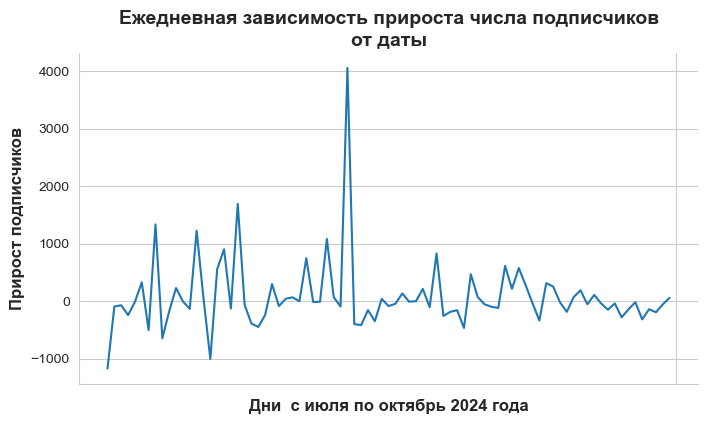

In [64]:
growth_data = reach_rate.groupby('date', 
                      as_index = False)['growth'].mean().sort_values('date')
sns.relplot(data = growth_data, x = 'date', y = 'growth', 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Ежедневная зависимость прироста числа подписчиков\nот даты', fontsize=14, fontweight ='bold')
plt.xlabel('Дни  с июля по октябрь 2024 года', fontsize=12,  fontweight ='bold')
plt.ylabel('Прирост подписчиков', fontsize=12, fontweight ='bold')
plt.xticks('');
plt.show();

In [65]:
growth_data.sort_values('growth', ascending = False).head(10)

,date,growth
35,13.09.2024,4057.035714
19,07.09.2024,1691.000000
7,03.09.2024,1334.615385
13,05.09.2024,1223.866667
32,12.09.2024,1079.826087
17,07.07.2024,902.000000
48,18.09.2024,829.103448
29,11.09.2024,745.882353
58,22.08.2024,611.500000
60,23.08.2024,574.772727


13 сентября - поднятие ставки ЦБ до 19 %

In [66]:
growth_data.sort_values('growth').head(10)

,date,growth
0,01.07.2024,-1175.230769
15,06.08.2024,-1009.000000
8,04.07.2024,-647.818182
6,03.07.2024,-505.703704
52,20.07.2024,-468.000000
22,09.07.2024,-450.892857
37,14.08.2024,-418.458333
36,14.07.2024,-401.500000
21,08.08.2024,-392.000000
39,15.07.2024,-350.642857


В основном это начала июля и августа. Предполагаю, что отписки из-за начала отпуска. 

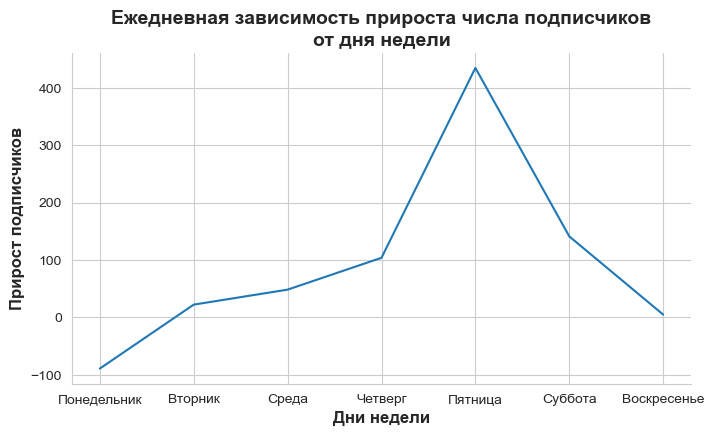

In [61]:
growth_data = reach_rate.groupby('day_of_week_russian', observed = False, 
                      as_index = False)['growth'].mean()
sns.relplot(data = growth_data, x = 'day_of_week_russian', y = 'growth', 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Ежедневная зависимость прироста числа подписчиков\nот дня недели', fontsize=14, fontweight ='bold')
plt.xlabel('Дни недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Прирост подписчиков', fontsize=12, fontweight ='bold')
plt.show();

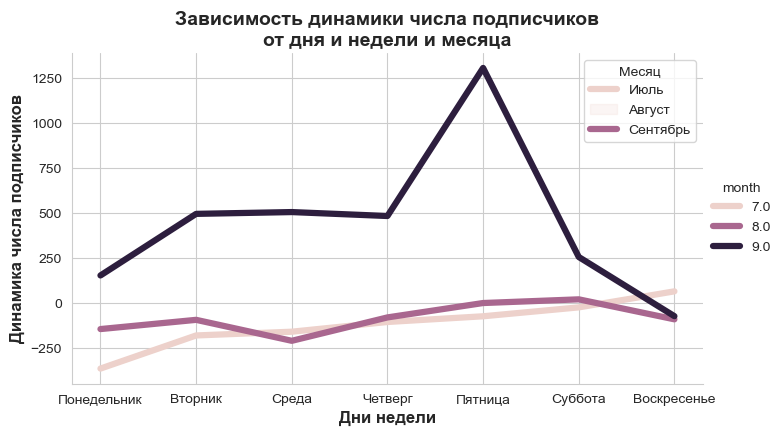

In [62]:

growth_data = reach_rate.groupby(['day_of_week_russian', 'month' ], observed = False, 
                      as_index = False)['growth'].mean()
sns.relplot(data = growth_data, x = 'day_of_week_russian', y = 'growth', hue = 'month' , linewidth = 4.5, 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Зависимость динамики числа подписчиков\nот дня и недели и месяца', fontsize=14, fontweight ='bold')
plt.xlabel('Дни недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Динамика числа подписчиков', fontsize=12, fontweight ='bold')
plt.legend(labels = ['Июль', 'Август', 'Сентябрь' ], title = 'Месяц', loc = 'best' )
plt.show();

 - Наибольший наплыв числа подписчиков происходит в пятницу, положительная динамика медленно увеличивается с понедельника, с вторника по четверг выходит на плато, резкий рост в пятницу, и падение в выходные.  
 - В среднем наибольшая положительная динамика наблюдалась в сентябрь, с положительными пиками во вторник и пятницу, и отрицательными пиками в св понедельник и выходные.
 - В июле и августе линии более плавные, также наибольшее число отписок в понедельник. 

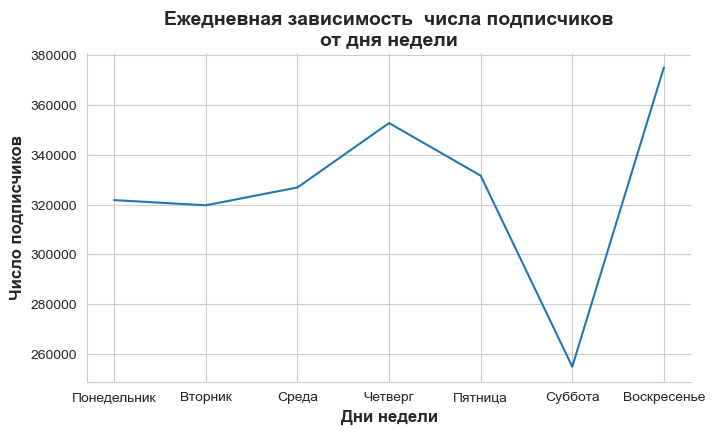

In [40]:
growth_data = reach_rate.groupby('day_of_week_russian', observed=False, 
                      as_index = False)['amount'].mean()
sns.relplot(data = growth_data, x = 'day_of_week_russian', y = 'amount', 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Ежедневная зависимость  числа подписчиков\nот дня недели', fontsize=14, fontweight ='bold')
plt.xlabel('Дни недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Число подписчиков', fontsize=12, fontweight ='bold')
plt.show();

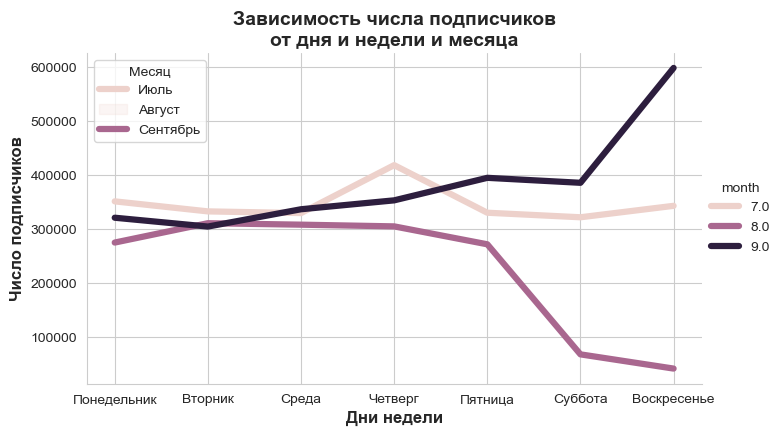

In [41]:
growth_data = reach_rate.groupby(['day_of_week_russian', 'month' ], observed = False, 
                      as_index = False)['amount'].mean()
sns.relplot(data = growth_data, x = 'day_of_week_russian', y = 'amount', hue = 'month' , linewidth = 4.5, 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Зависимость числа подписчиков\nот дня и недели и месяца', fontsize=14, fontweight ='bold')
plt.xlabel('Дни недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Число подписчиков', fontsize=12, fontweight ='bold')
plt.legend(labels = ['Июль', 'Август', 'Сентябрь' ], title = 'Месяц', loc = 'best' )
plt.show();

Если смотреть не динамику числа подписчиков, а само число подписчиков то получается немного иная картина:

 - По дням недели пик подписчиков в четверг и воскресение, а главный отрицательный пик - суббота
 - Если смотреть по месяцам, то вновь сентябрь вырывается вперед, причем для него  происходит увеличение подписчиков даже в выходные. Интересно, что пик по числу подписчиков есть только в июле. 
В остальном месяца сильно схожи по числу подписчиков
 - Результаты вполне ожидаемы, динамика числа подписчиков фактически выполняет роль *производной* для числа подписчиков, с этим связаны те или иные "несостыковки". Также объяснима разница по месяцам, видно, что в августе и июле пользователи стараются отдыхать (особенно в августе) и меньше вовлечены в телеграм активность, чаще отписываются
 - Далее будем скорее использовать именно динамику прироста

In [32]:
def barplot(df, category_column, numeric_column,x_label, y_label):
    grouped_df = df.groupby(category_column)[numeric_column].mean().reset_index().sort_values(numeric_column)
  
    plt.figure(figsize=(10, 4))
    sns.barplot(x=category_column, y=numeric_column, data=grouped_df, hue = category_column)
    plt.title(f'Mean {numeric_column} by {category_column}', fontsize=14, fontweight ='bold')
    plt.xlabel( x_label, fontsize=12,  fontweight ='bold')
    plt.ylabel(y_label, fontsize=12, fontweight ='bold')
    plt.xticks(rotation=55)
    plt.show()

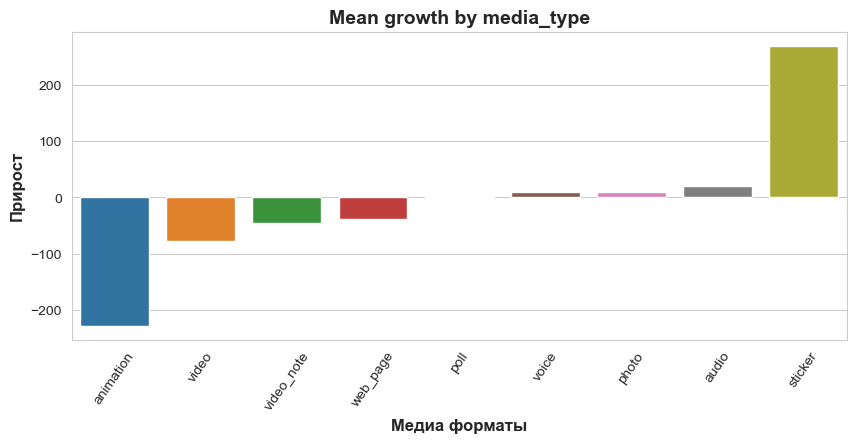

In [33]:
barplot(reach_rate, 'media_type', 'growth', 'Медиа форматы', 'Прирост' )

С точки зрения прироста наилучшими являются стикеры, аудио, фото. Интересно, что видео и анимации могут отрицательно влияют на число подписчиков

### Reach rate

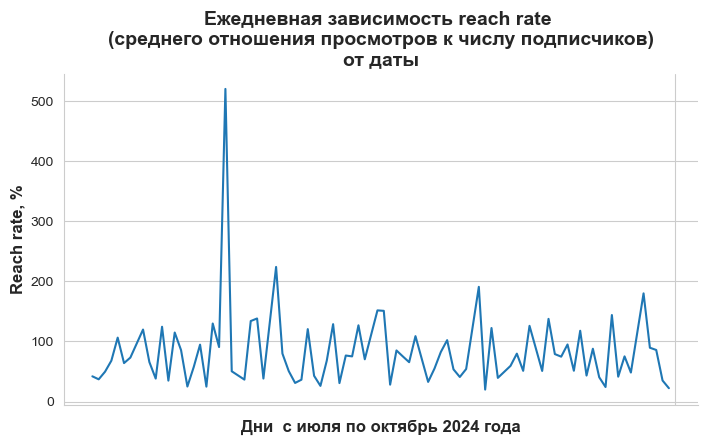

In [37]:
reach_data = reach_rate.groupby('date', 
                      as_index = False)['reach_rate'].mean().sort_values('date')
sns.relplot(data = reach_data, x = 'date', y = 'reach_rate', 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Ежедневная зависимость reach rate \n(среднего отношения просмотров к числу подписчиков)\nот даты', fontsize=14, fontweight ='bold')
plt.xlabel('Дни  с июля по октябрь 2024 года', fontsize=12,  fontweight ='bold')
plt.ylabel('Reach rate, %', fontsize=12, fontweight ='bold')
plt.xticks('');
plt.show();

Даже линия по усредненному по дням значение очень ломанная, потсмотрим зависимость от дня недели и месяца. Но также глянем и на самый главный пик

In [40]:
reach_data.sort_values('reach_rate', ascending = False).head(10)

,date,reach_rate
21,08.07.2024,520.221623
29,10.09.2024,224.003666
61,21.08.2024,190.872105
87,30.07.2024,180.000040
45,16.07.2024,151.690559
46,16.08.2024,150.926431
82,28.08.2024,143.954459
26,09.09.2024,138.228604
72,25.07.2024,137.574132
25,09.08.2024,133.963153


Главный пик - 8 июля 2024 года... 
Это поднятие ставки центробанка до 18%, 14 пакет санкций ЕС против России, но связываются сложно

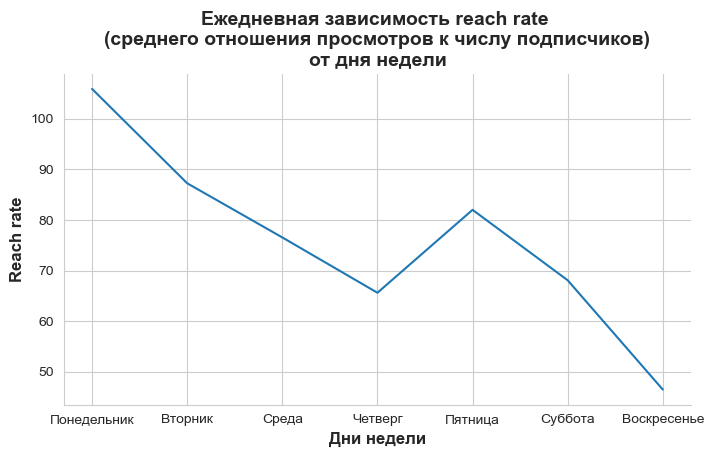

In [42]:
reach_data = reach_rate.groupby('day_of_week_russian', observed = False,
                      as_index = False)['reach_rate'].mean()
sns.relplot(data = reach_data, x = 'day_of_week_russian', y = 'reach_rate', 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Ежедневная зависимость reach rate \n(среднего отношения просмотров к числу подписчиков)\nот дня недели', fontsize=14, fontweight ='bold')
plt.xlabel('Дни недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Reach rate', fontsize=12, fontweight ='bold')
plt.show();

По дням недели - наибольший охват достигается в пятницу, то есть или все больше и больше пользователей просматривают пост, и максимум этих просмотров дотсигается в пятницу

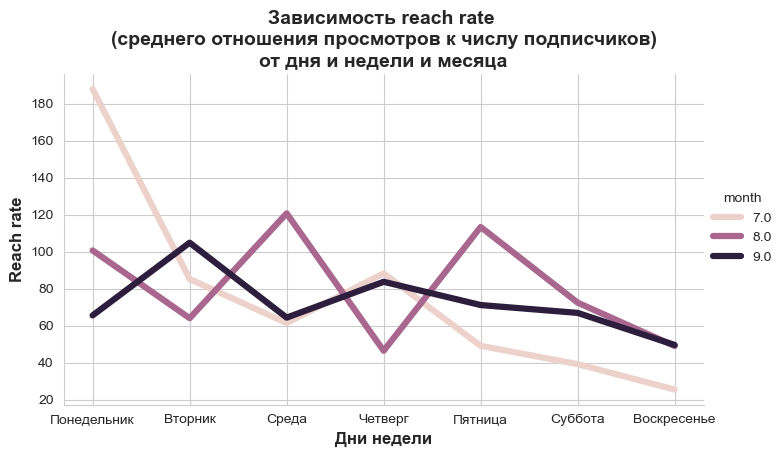

In [43]:
reach_data = reach_rate.groupby(['day_of_week_russian', 'month'],  observed=False,
                      as_index = False)['reach_rate'].mean()
sns.relplot(data = reach_data, x = 'day_of_week_russian', y = 'reach_rate', hue = 'month' , linewidth = 4.5, 
            kind= 'line', height=4,  aspect=1.8);
plt.title('Зависимость reach rate \n(среднего отношения просмотров к числу подписчиков)\nот дня и недели и месяца', fontsize=14, fontweight ='bold')
plt.xlabel('Дни недели', fontsize=12,  fontweight ='bold')
plt.ylabel('Reach rate', fontsize=12, fontweight ='bold')
#plt.legend(labels = ['Июль', 'Август', 'Сентябрь' ], title = 'Месяц', loc = 'best' )
plt.show();

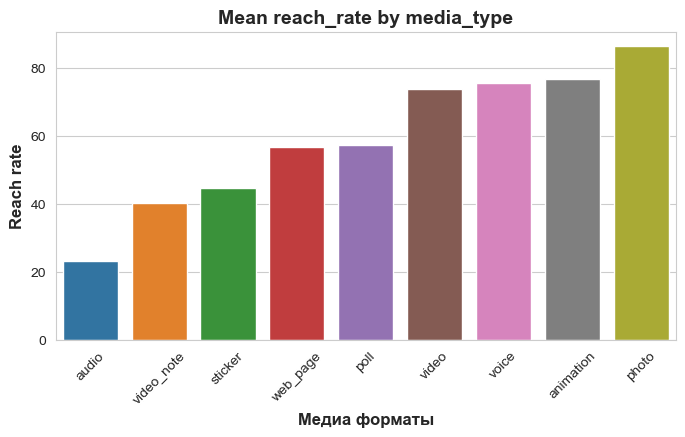

In [30]:
barplot(reach_rate, 'media_type', 'reach_rate', 'Медиа форматы', 'Reach rate' )

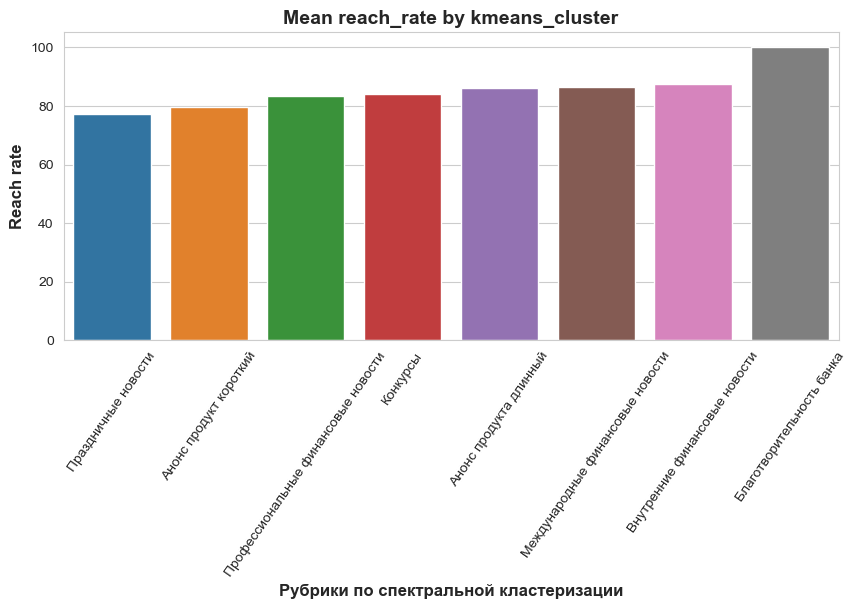

In [44]:
barplot(reach_rate, 'kmeans_cluster', 'reach_rate', 'Рубрики по спектральной кластеризации', 'Reach rate' )

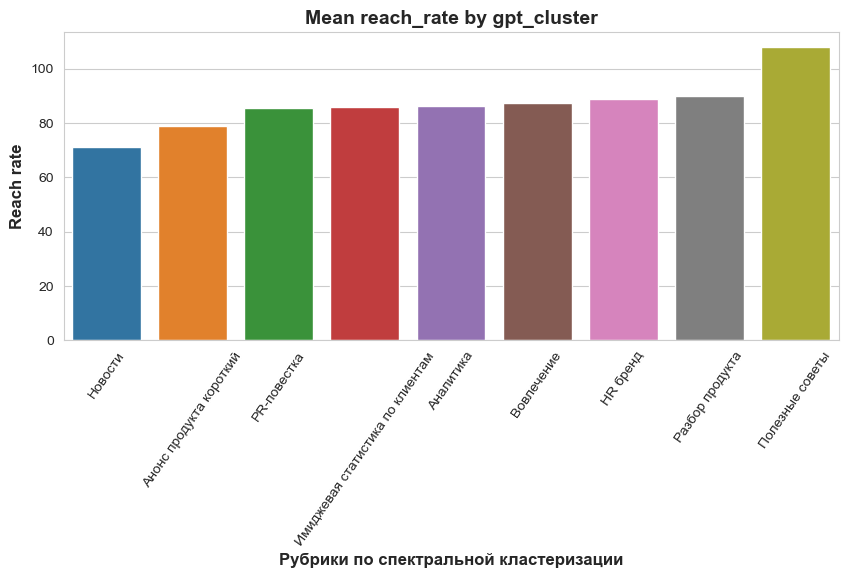

In [34]:
barplot(reach_rate, 'gpt_cluster', 'reach_rate', 'Рубрики по спектральной кластеризации', 'Reach rate' )

### Финальные выводы
 - Наибольший наплыв числа подписчиков происходит в пятницу, положительная динамика медленно увеличивается с понедельника, с вторника по четверг выходит на плато, резкий рост в пятницу, и падение в выходные.
 - В сентябре люди более активно подписываются на телеграм каналы, проявляют там определенную активность.
 - Reach rate (так как это отношение просмотров к числу подписчиков) по дням недели достигает пиков в понедельник и пятницу, наибольший провал происходит в воскресение, между пиками в понедельник и пятницу также проходят постепенные снижения
 - Статистика по месяцам очень сильно разнится
    - Сентябрь очень плавный, главные пики в вторник и четверг
    - Июль - сильные скачки, максимум в понедельник, далее очень резкое понижение, и второй пик в четверг, как и в сентябре
    - Август выглядит противоположность сентябрю с пиками, где в сентябре reach rate проваливался, это среда и пятница
 - Лучшие медиа фоматы с точкти зрения reach rate - видео, войсы, анимации. Интересно, что опросы тоже не так плохи с точки зрения reach rate (опросы проваливались сильно по реакциям пользователей)
 - Лучшие рубрики по спектральному анализу это благотворительные новости, финансовые новости, длинные анонсы продуктов. Про новости весьма актуально, увидели раньше, что пики по числу подписчиков и reach_rate достигаются в дни когда поднималась ставка ЦБ
 - Лучшие рубрики по чату gpt - разборы продукта, полезные советы и HR брендинг (здесь важно напоминание что чат gpt был не всегда точен в назначении рубрики)
 - Интересное замечание -  reach_rate и реакция пользователей как мы увидели, иногда отрицательно скоррелированы. То есть **больший охват (reach rate) достигается благодаря плохим новостям**. Например, люди из новостей узнают об ухудшение финансовой ситуации, и срочно бегут в телеграм каналы банков, узнать реакцию банков, политику банков в новой ухудщающейся ситуации 